In [74]:
import folium
import sentinel_helpers

Let's search for a more detailed geometry this time that would be hard to find outside of OpenStreetMap:

In [2]:
tempelhofer_feld = sentinel_helpers.search_osm('Tempelhofer Feld, Berlin, Germany').iloc[:1]

In [3]:
# there's a warning about this being in WGS84 which we can ignore
minx, miny, maxx, maxy = tempelhofer_feld.bounds.values[0]

## Is the area we have the area we want?

We preview the geometry on a Leaflet-based map so we can get a better idea of the surrounding area.
Just previewing the outline (as done previously) is not enough in our case.

In [4]:
m = folium.Map([52, 12], tiles='cartodbpositron')
folium.GeoJson(tempelhofer_feld.to_json()).add_to(m)
m.fit_bounds([[miny, minx], [maxy, maxx]])
m

It is! Let's try and be a bit less wasteful this time:

We download the files from Amazon AWS; keeping the other example (Scihub) still makes sense though, because we have no guarantee from Amazon to provide its service, just its goodwill.

**NOPE** We need an Amazon AWS access key… maybe we should look into that? For now let's just focus on the task at hand.

We define the search area by constructing a polygon using the bounding box from above:

In [71]:
bounds = [(minx, miny), (minx, maxy), (maxx, maxy), (maxx, miny), (minx, miny)]
footprint = 'POLYGON ((' + ', '.join([f'{x} {y}' for x, y in bounds]) + '))'
footprint

'POLYGON ((13.3860533 52.4656349, 13.3860533 52.4832726, 13.4205262 52.4832726, 13.4205262 52.4656349, 13.3860533 52.4656349))'

Let's search for all images that give us a reasonably clear view of the Tempelhofer Feld in 2019.

In [ ]:
tempelhofer_feld.to_crs()

In [6]:
from sentinelsat import SentinelAPI
from datetime import date
import os

In [7]:
api = SentinelAPI(os.getenv('SCIHUB_USERNAME'), os.getenv('SCIHUB_PASSWORD'))

In [8]:
products = api.query(footprint,
                     platformname='Sentinel-2',
                     processinglevel='Level-2A',
                     date=(date(2019,1,1), date(2019,12,31)),
                     cloudcoverpercentage=(0,30))

In [9]:
len(products)

77

We only want the products that acutally contain the Tempelhofer Feld.
We can verify that they all do:

In [10]:
products_gdf = api.to_geodataframe(products)
products_gdf.head()

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,title,link,link_alternative,link_icon,summary,beginposition,endposition,ingestiondate,orbitnumber,relativeorbitnumber,...,processingbaseline,processinglevel,producttype,platformname,size,filename,level1cpdiidentifier,identifier,uuid,geometry
3318d298-429c-419d-a141-ec4c2f1820db,S2A_MSIL2A_20191220T101431_N0213_R022_T33UUU_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2019-12-20T10:14:31.024Z, Instrument: MS...",2019-12-20 10:14:31.024,2019-12-20 10:14:31.024,2019-12-20 18:15:27.995,23471,22,...,02.13,Level-2A,S2MSI2A,Sentinel-2,808.04 MB,S2A_MSIL2A_20191220T101431_N0213_R022_T33UUU_2...,S2A_OPER_MSI_L1C_TL_MTI__20191220T105312_A0234...,S2A_MSIL2A_20191220T101431_N0213_R022_T33UUU_2...,3318d298-429c-419d-a141-ec4c2f1820db,"MULTIPOLYGON (((12.37364 52.23165, 13.67854 52..."
b602a256-860c-4254-9f28-96c696b8abdb,S2A_MSIL2A_20191220T101431_N0213_R022_T32UQD_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2019-12-20T10:14:31.024Z, Instrument: MS...",2019-12-20 10:14:31.024,2019-12-20 10:14:31.024,2019-12-20 18:13:54.812,23471,22,...,02.13,Level-2A,S2MSI2A,Sentinel-2,758.00 MB,S2A_MSIL2A_20191220T101431_N0213_R022_T32UQD_2...,S2A_OPER_MSI_L1C_TL_MTI__20191220T105312_A0234...,S2A_MSIL2A_20191220T101431_N0213_R022_T32UQD_2...,b602a256-860c-4254-9f28-96c696b8abdb,"MULTIPOLYGON (((13.53103 52.17548, 13.63418 53..."
2b3f3844-5865-4954-b300-575aa09459d5,S2A_MSIL2A_20191213T102421_N0213_R065_T33UUU_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2019-12-13T10:24:21.024Z, Instrument: MS...",2019-12-13 10:24:21.024,2019-12-13 10:24:21.024,2019-12-13 17:58:46.300,23371,65,...,02.13,Level-2A,S2MSI2A,Sentinel-2,1.05 GB,S2A_MSIL2A_20191213T102421_N0213_R065_T33UUU_2...,S2A_OPER_MSI_L1C_TL_MTI__20191213T110225_A0233...,S2A_MSIL2A_20191213T102421_N0213_R065_T33UUU_2...,2b3f3844-5865-4954-b300-575aa09459d5,"MULTIPOLYGON (((12.07160 52.22621, 13.67854 52..."
ecf4ff24-3f5c-40c8-b2b9-191f5adf77be,S2A_MSIL2A_20191213T102421_N0213_R065_T32UQD_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2019-12-13T10:24:21.024Z, Instrument: MS...",2019-12-13 10:24:21.024,2019-12-13 10:24:21.024,2019-12-13 17:57:52.211,23371,65,...,02.13,Level-2A,S2MSI2A,Sentinel-2,1.05 GB,S2A_MSIL2A_20191213T102421_N0213_R065_T32UQD_2...,S2A_OPER_MSI_L1C_TL_MTI__20191213T110225_A0233...,S2A_MSIL2A_20191213T102421_N0213_R065_T32UQD_2...,ecf4ff24-3f5c-40c8-b2b9-191f5adf77be,"MULTIPOLYGON (((13.53103 52.17548, 13.63418 53..."
b9903874-93ef-4520-bf49-951e810484f3,S2A_MSIL2A_20191210T101411_N0213_R022_T33UUU_2...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,https://scihub.copernicus.eu/apihub/odata/v1/P...,"Date: 2019-12-10T10:14:11.024Z, Instrument: MS...",2019-12-10 10:14:11.024,2019-12-10 10:14:11.024,2019-12-10 17:49:27.699,23328,22,...,02.13,Level-2A,S2MSI2A,Sentinel-2,818.15 MB,S2A_MSIL2A_20191210T101411_N0213_R022_T33UUU_2...,S2A_OPER_MSI_L1C_TL_MTI__20191210T104357_A0233...,S2A_MSIL2A_20191210T101411_N0213_R022_T33UUU_2...,b9903874-93ef-4520-bf49-951e810484f3,"MULTIPOLYGON (((12.36269 52.23145, 13.67854 52..."


In [11]:
import geopandas as gpd

In [12]:
intersected = gpd.overlay(products_gdf.to_crs('EPSG:4326'), tempelhofer_feld.to_crs('EPSG:4326'), how='intersection')
len(intersected)

77

In [13]:
intersected.geometry.unique()

<GeometryArray>
Length: 1, dtype: geometry

We have the same (non-empty) geometry 77 times, so this must be the exact geometry of the Tempelhofer Feld.
We can reduce the number of files to download 

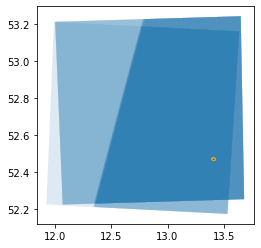

In [14]:
deduped = products_gdf.drop_duplicates(subset='beginposition', keep='first')
ax = deduped.plot(alpha=0.05)
tempelhofer_feld.plot(ax=ax, edgecolor='orange')

This gives you an idea of how much we download that we actually don't need.
To get around this we download the images one after another and subset them as needed.

In [15]:
! mkdir -p input/tempelhofer_feld

In [16]:
uuids = deduped['uuid'].values

In [17]:
downloaded = api.download(uuids[0], directory_path='./input/tempelhofer_feld')
downloaded

{'id': '3318d298-429c-419d-a141-ec4c2f1820db',
 'title': 'S2A_MSIL2A_20191220T101431_N0213_R022_T33UUU_20191220T115219',
 'size': 847344116,
 'md5': 'E52BBFEDD96C6597A4A6BF56735F05A1',
 'date': datetime.datetime(2019, 12, 20, 10, 14, 31, 24000),
 'footprint': 'POLYGON((12.373643777414705 52.23165052768991,12.38257054083412 52.252838389043575,12.444160541342692 52.39846549420357,12.506495380605523 52.54409344872838,12.5694925743077 52.68971130837672,12.632826954776249 52.83538284450448,12.696977442298332 52.980980051610814,12.761605530544704 53.12652180918453,12.805846567368569 53.226592948474405,13.648341514492438 53.24196354764364,13.678544065009483 52.25515074878083,12.373643777414705 52.23165052768991))',
 'url': "https://scihub.copernicus.eu/apihub/odata/v1/Products('3318d298-429c-419d-a141-ec4c2f1820db')/$value",
 'Online': True,
 'Creation Date': datetime.datetime(2019, 12, 20, 18, 16, 6, 778000),
 'Ingestion Date': datetime.datetime(2019, 12, 20, 18, 15, 27, 995000),
 'path': '.

For the NDVI we only need bands 4 and 8.

In [161]:
b04_path, b08_path = sentinel_helpers.band_paths(downloaded['path'], ['B04', 'B08'], '10m')

**TODO** I placed the `RasterReaderList` into `sentinel_helpers.py` at this point but I couldn't figure out how to make it work.

**TODO** We need to do three things:

- Reproject the image into our target geometry
- Create a subset, where [this content on the rasterio homepage](https://rasterio.readthedocs.io/en/latest/topics/masking-by-shapefile.html) may help
- Make sure to mask clouds or keep the cloud mask somewhere

In [34]:
! mkdir -p './input/tempelhofer_feld/subset/'

In [124]:
from pathlib import Path
import math

import rasterio as r
import rasterio.mask
from rasterio.windows import Window
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.plot import show
import numpy as np

import shapely.geometry

The finally helpful tip for clipping came from [this website](https://automating-gis-processes.github.io/CSC/notebooks/L5/clipping-raster.html).

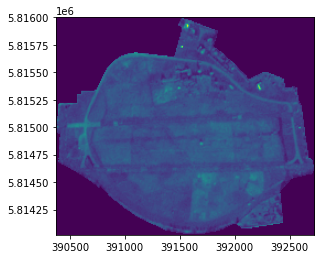

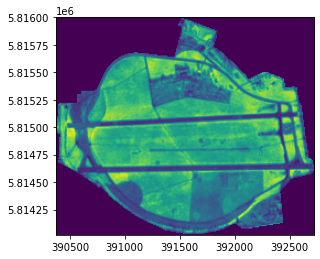

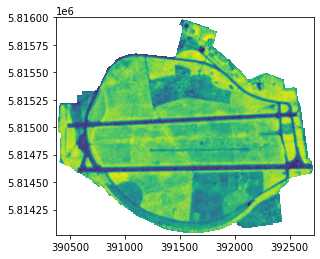

In [172]:
with r.open(b04_path, 'r') as b04, r.open(b08_path, 'r') as b08:
    # we want to only write the bare minimum data necessary to disk
    out_meta = b04.meta.copy()
    
    # we reproject the geojson file we fetched above and convert it so that rasterio
    # can use it as a mask
    mask = shapely.geometry.mapping(tempelhofer_feld.to_crs(out_meta['crs']).iloc[0].geometry)
    
    # update the dimensions and save as geotiff, not jp2
    out_meta['width'] = maxx - minx
    out_meta['height'] = maxy - miny
    out_meta['driver'] = 'GTiff'
    out_meta['dtype'] = 'float32'
    
    out_name = Path(b04_path).name.replace('B04', 'NDVI').replace('.jp2', '.tiff')
    
    with r.open(str(Path('./input/tempelhofer_feld/subset/') / out_name), 'w+', **out_meta) as dst:
        # we take only the part out of our source raster that we actually need
        # crop=True clips off the borders
        b04, transform_b04 = rasterio.mask.mask(b04, shapes=[mask], crop=True)
        b08, _ = rasterio.mask.mask(b08, shapes=[mask], crop=True) # we ignore the returned transform because it's identical to the previous one
        
        # transform and clip our bands to the allowed region
        b04 = b04.astype('f4') # <- f4 = float32
        b08 = b08.astype('f4')
        
        # uncomment the following line to see if your masked shape looks correct
        show(b04, transform=transform_b04)
        show(b08, transform=transform_b04)
        
        # we want to be able to ignore divide by zero errors so the formula is nicer to write
        np.seterr(divide='ignore', invalid='ignore')
        ndvi = (b08 - b04) / (b08 + b04)
       
        # uncomment the following line to see if we calculated the index correctly
        show(ndvi, transform=transform_b04)
        
        dst.write(ndvi)

In [85]:
target_crs = 'EPSG:25833'

# **TODO** Plot bands separately

``` python
with r.open(band_paths(downloaded[0]['path'], ['TCI'], '20m')[0]) as true_color:
    # we do not need
    fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(21,7))
    plot.show((true_color, 1), ax=axr, cmap='Reds', title='red channel')
    plot.show((true_color, 2), ax=axg, cmap='Greens', title='green channel')
    plot.show((true_color, 3), ax=axb, cmap='Blues', title='blue channel')
    plt.show()
```